In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
#in order to access a file in the Google Cloud bucket, you need to read in the key as credentials
#save file in same folder as script for ease of use, best practices usually recommend a 'keys' folder
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'peii-242723-111b55a1e645.json'

In [3]:
#infinite columns
pd.set_option('display.max_columns', None)

In [6]:
df2= pd.read_csv('gs://impact-index-shared-resources/Facts and Figures 2019')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xdb in position 0: invalid continuation byte

In [4]:
df = pd.read_csv('gs://impact-index-shared-resources/data/processed/tax_foundation_dfs.csv')
df

,State,State & Local Tax Collections per Capita,State-Local Tax Burden as a % of State Income,State Tax Collections per Capita,State Revenue per Capita,State & Local Revenue per Capita,Federal Aid as a Percentage of State General Revenue,State Individual Income Tax Collections per Capita,State & Local Individual Income Tax Collections per Capita,State Corporate Income Tax Collections per Capita,State and Local Corporate Income Tax Collections per Capita,State Tax Rate,Avg. Local Sales Tax Rate,Combined Avg Local and State Sales Tax Rate,State General Sales Tax Collections per Capita,State & Local General Sales Tax Collections per Capita,State Sales Tax Breadth,Excise Tax on Gasoline,Other Taxes and Fees on Gasoline,Total Gasoline Tax,Gasoline & License Taxes,Tolls & User Fees,"Total, Tolls, User Fees, & User Taxes",State Cigarette Excise Tax Rates,State Spirits Excise Tax Rates,State Wine Excise Tax Rates,State Beer Excise Tax Rates,State & Local Cell Phone Tax Rates,State & Local Excise & Selective Sales Tax Collections per Capita,Property Taxes Paid as a percentage of Owner-Occupied Housing Value,State & Local Property Tax Collections per Capita,State Debt per Capita,State & Local Debt per Capita,Funded Ratio of Public Pension Plans,Income per Capita by State,Property tax as a percentage of collections,General Sales as a percentage of collections,Individual Income as a percentage of collections,Corporate income as a percentage of collections,Max State Income Tax
0,Ala.,3206.414507,0.087,2137.167734,5491.997226,7827.021661,0.371337,743.5345875385943,743.215627,106.69538337066518,77.497482,0.04000,0.051429,0.091429,544.619648978706,984.453595,0.359388,18.00,3.09,21.09,0.345945,0.010630,0.356575,0.675,19.152242,1.700000,1.050000,0.1053,589.060075,0.003728,548.279874,1799.656680,5939.302280,0.67,40805,0.170995,0.307026,0.231790,0.024170,0.05000
1,Alaska,3812.465443,0.065,1608.264452,11280.575024,14550.830589,0.373039,$0,0.000000,118.64773349373813,286.238304,0.00000,0.014293,0.014293,$0,316.276523,0.000000,8.95,5.49,14.44,0.069405,0.057353,0.126758,2.000,12.800000,2.500000,1.070000,0.1949,489.766993,0.010161,2047.008720,8004.532337,12609.195681,0.63,57179,0.536925,0.082959,0.000000,0.075080,0.00000
2,Ariz.,3581.559299,0.088,1979.486394,4942.709445,7293.012433,0.411538,491.09427088752284,574.342107,52.468904417874455,82.584682,0.05600,0.027687,0.083687,935.8965661241657,1387.723376,0.374987,18.00,1.00,19.00,0.457881,0.014824,0.472705,2.000,3.000000,0.840000,0.160000,0.1257,337.289297,0.006440,1061.784067,2036.886978,7062.845781,0.60,42280,0.296459,0.387463,0.160361,0.023058,0.04540
3,Ark.,3957.681652,0.101,3167.575648,7039.637797,8252.626387,0.363086,921.2749548227711,930.804212,132.14118928368504,150.643976,0.06500,0.029342,0.094342,1126.5245338398997,1483.436187,0.424881,21.50,0.30,21.80,0.368250,0.006211,0.374461,1.150,7.734120,1.441030,0.000000,0.1522,497.895243,0.006333,711.649133,1598.366530,5316.362758,0.77,41046,0.179815,0.374825,0.235189,0.038064,0.06900
4,Calif.,6077.010977,0.110,3936.400180,7299.143683,11341.954429,0.322384,2129.587221255173,2054.976762,255.77582401828502,251.986590,0.07250,0.013064,0.085564,894.301776126573,1332.323158,0.243914,41.70,12.66,54.36,0.513167,0.086992,0.600159,2.870,3.300000,0.200000,0.200000,0.1323,504.643343,0.006991,1559.071989,3829.497985,11042.128638,0.69,59796,0.256552,0.219240,0.338156,0.041466,0.13300
5,Colo.,4621.333591,0.089,2353.708495,4970.439549,8780.235276,0.306283,1211.2970323269165,1172.780987,94.26190184895938,113.218284,0.02900,0.047328,0.076328,531.175352059173,1224.358850,0.342336,22.00,0.00,22.00,0.429430,0.083160,0.512590,0.840,2.280000,0.315325,0.080000,0.1234,444.898786,0.005333,1424.896091,3028.397116,9570.215213,0.46,54646,0.308330,0.264936,0.253775,0.024499,0.04630
6,Conn.,7220.434626,0.126,4555.375365,7751.724549,10879.076062,0.279034,2218.2507920441094,2106.414861,250.05601719421298,200.537951,0.06350,0.000000,0.063500,1180.7139767637334,1046.020763,0.265168,25

In [5]:
corr = df.corr()
corr

,State & Local Tax Collections per Capita,State-Local Tax Burden as a % of State Income,State Tax Collections per Capita,State Revenue per Capita,State & Local Revenue per Capita,Federal Aid as a Percentage of State General Revenue,State & Local Individual Income Tax Collections per Capita,State and Local Corporate Income Tax Collections per Capita,State Tax Rate,Avg. Local Sales Tax Rate,Combined Avg Local and State Sales Tax Rate,State & Local General Sales Tax Collections per Capita,State Sales Tax Breadth,Excise Tax on Gasoline,Other Taxes and Fees on Gasoline,Total Gasoline Tax,Gasoline & License Taxes,Tolls & User Fees,"Total, Tolls, User Fees, & User Taxes",State Cigarette Excise Tax Rates,State Spirits Excise Tax Rates,State Wine Excise Tax Rates,State Beer Excise Tax Rates,State & Local Cell Phone Tax Rates,State & Local Excise & Selective Sales Tax Collections per Capita,Property Taxes Paid as a percentage of Owner-Occupied Housing Value,State & Local Property Tax Collections per Capita,State Debt per Capita,State & Local Debt per Capita,Funded Ratio of Public Pension Plans,Income per Capita by State,Property tax as a percentage of collections,General Sales as a percentage of collections,Individual Income as a percentage of collections,Corporate income as a percentage of collections,Max State Income Tax
State & Local Tax Collections per Capita,1.000000,0.622861,0.327650,0.061441,0.837803,-0.665192,0.679540,0.687774,0.115097,-0.224769,-0.049487,0.280094,-0.169365,-0.045523,0.259074,0.278040,-0.364255,0.398663,-0.018452,0.727756,-0.112829,-0.048933,-0.144961,0.103897,0.381739,0.263186,0.758008,0.378745,0.778798,-0.463729,0.859618,0.167181,-0.308198,0.213886,0.261379,0.421543
State-Local Tax Burden as a % of State Income,0.622861,1.000000,0.552826,0.110947,0.302869,-0.379944,0.822151,0.387216,0.264377,-0.269661,0.043913,-0.016263,-0.137176,0.050184,0.378442,0.511381,-0.048562,0.443132,0.297789,0.613249,0.067132,-0.091852,-0.326467,-0.008784,0.264288,0.356928,0.389488,0.428585,0.445558,-0.256762,0.452314,-0.078025,-0.368627,0.671800,0.147016,0.673665
State Tax Collections per Capita,0.327650,0.552826,1.000000,0.671824,0.126805,-0.013773,0.344054,-0.092869,0.165190,-0.233953,-0.014388,0.060665,0.256618,0.068630,0.277475,0.403657,-0.031456,0.135928,0.076552,0.357107,0.018144,-0.162644,-0.293685,-0.133498,0.458820,0.216016,0.104280,0.526884,0.044280,0.064560,0.187513,-0.153215,-0.177382,0.274273,-0.141892,0.393934
State Revenue per Capita,0.061441,0.110947,0.671824,1.000000,0.264730,0.281144,0.032997,-0.144294,-0.265702,-0.172150,-0.327295,-0.175403,0.080608,-0.099473,0.149763,0.094749,-0.243549,0.082645,-0.153930,0.164095,0.079576,-0.015602,-0.128199,-0.039833,0.162168,0.034524,0.033721,0.562118,-0.055011,0.143901,0.049310,0.037812,-0.281799,0.037005,-0.027202,0.103935
State & Local Revenue per Capita,0.837803,0.302869,0.126805,0.264730,1.000000,-0.505163,0.478610,0.651037,-0.106087,-0.185149,-0.205063,0.187108,-0.259212,-0.127054,0.142395,0.060798,-0.499706,0.249420,-0.254350,0.592434,-0.021075,0.107970,0.027400,0.154839,0.233436,0.042324,0.654174,0.306505,0.695194,-0.439769,0.737717,0.194634,-0.325581,0.059169,0.310511,0.257739
Federal Aid as a Percentage of State General Revenue,-0.665192,-0.379944,-0.013773,0.281144,-0.505163,1.000000,-0.437789,-0.516752,-0.123212,0.261246,0.066159,-0.238528,0.115937,-0.086108,-0.027379,-0.111381,0.118676,-0.229391,-0.070597,-0.390906,-0.044880,-0.044294,-0.008946,-0.012574,-0.192416,-0.093589,-0.442609,-0.039464,-0.576146,0.352425,-0.628220,-0.045680,0.179555,-0.153279,-0.201170,-0.266019
State & Local Individual Income Tax Collections per Capita,0.679540,0.822151,0.344054,0.032997,0.478610,-0.437789,1.000000,0.546587,0.084054,-0.223605,-0.074132,-0.096572,-0.273642,0.052106,0.212809,0.309107,-0.082976,0.310938,0.165271,0.538100,0.019121,-0.016193,-0.163722,-0.089053,0.130062,0.104080,0.370486,0.310409,0.520328,-0.321485,0.516289,-0.134914,-0.477634,0.843157,0.257110,0.750892
State an

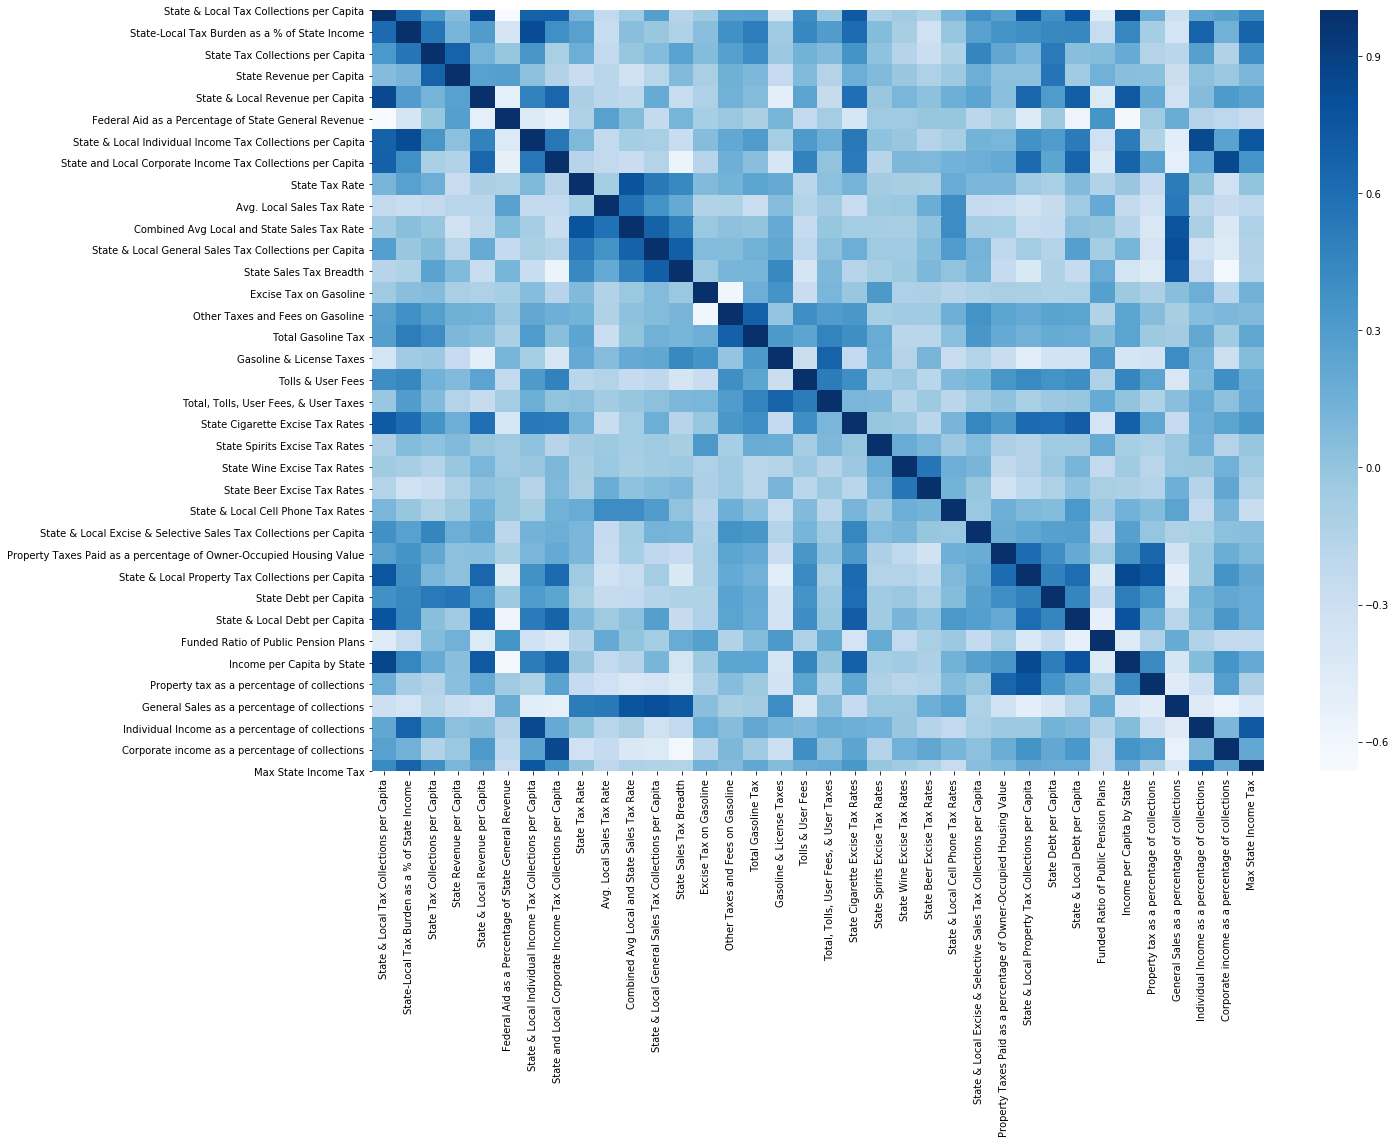

In [6]:
plt.figure(figsize=(20,14))
sns.heatmap(corr, cmap='Blues', xticklabels=corr.columns, yticklabels=corr.columns);

In [7]:
#looking at correlations within a set threshold -- eliminating noise
corr2 = corr[(corr > 0.1) | (corr < -0.1)]

### Creating an annotated heatmap

tutorial: https://towardsdatascience.com/annotated-heatmaps-in-5-simple-steps-cc2a0660a27d

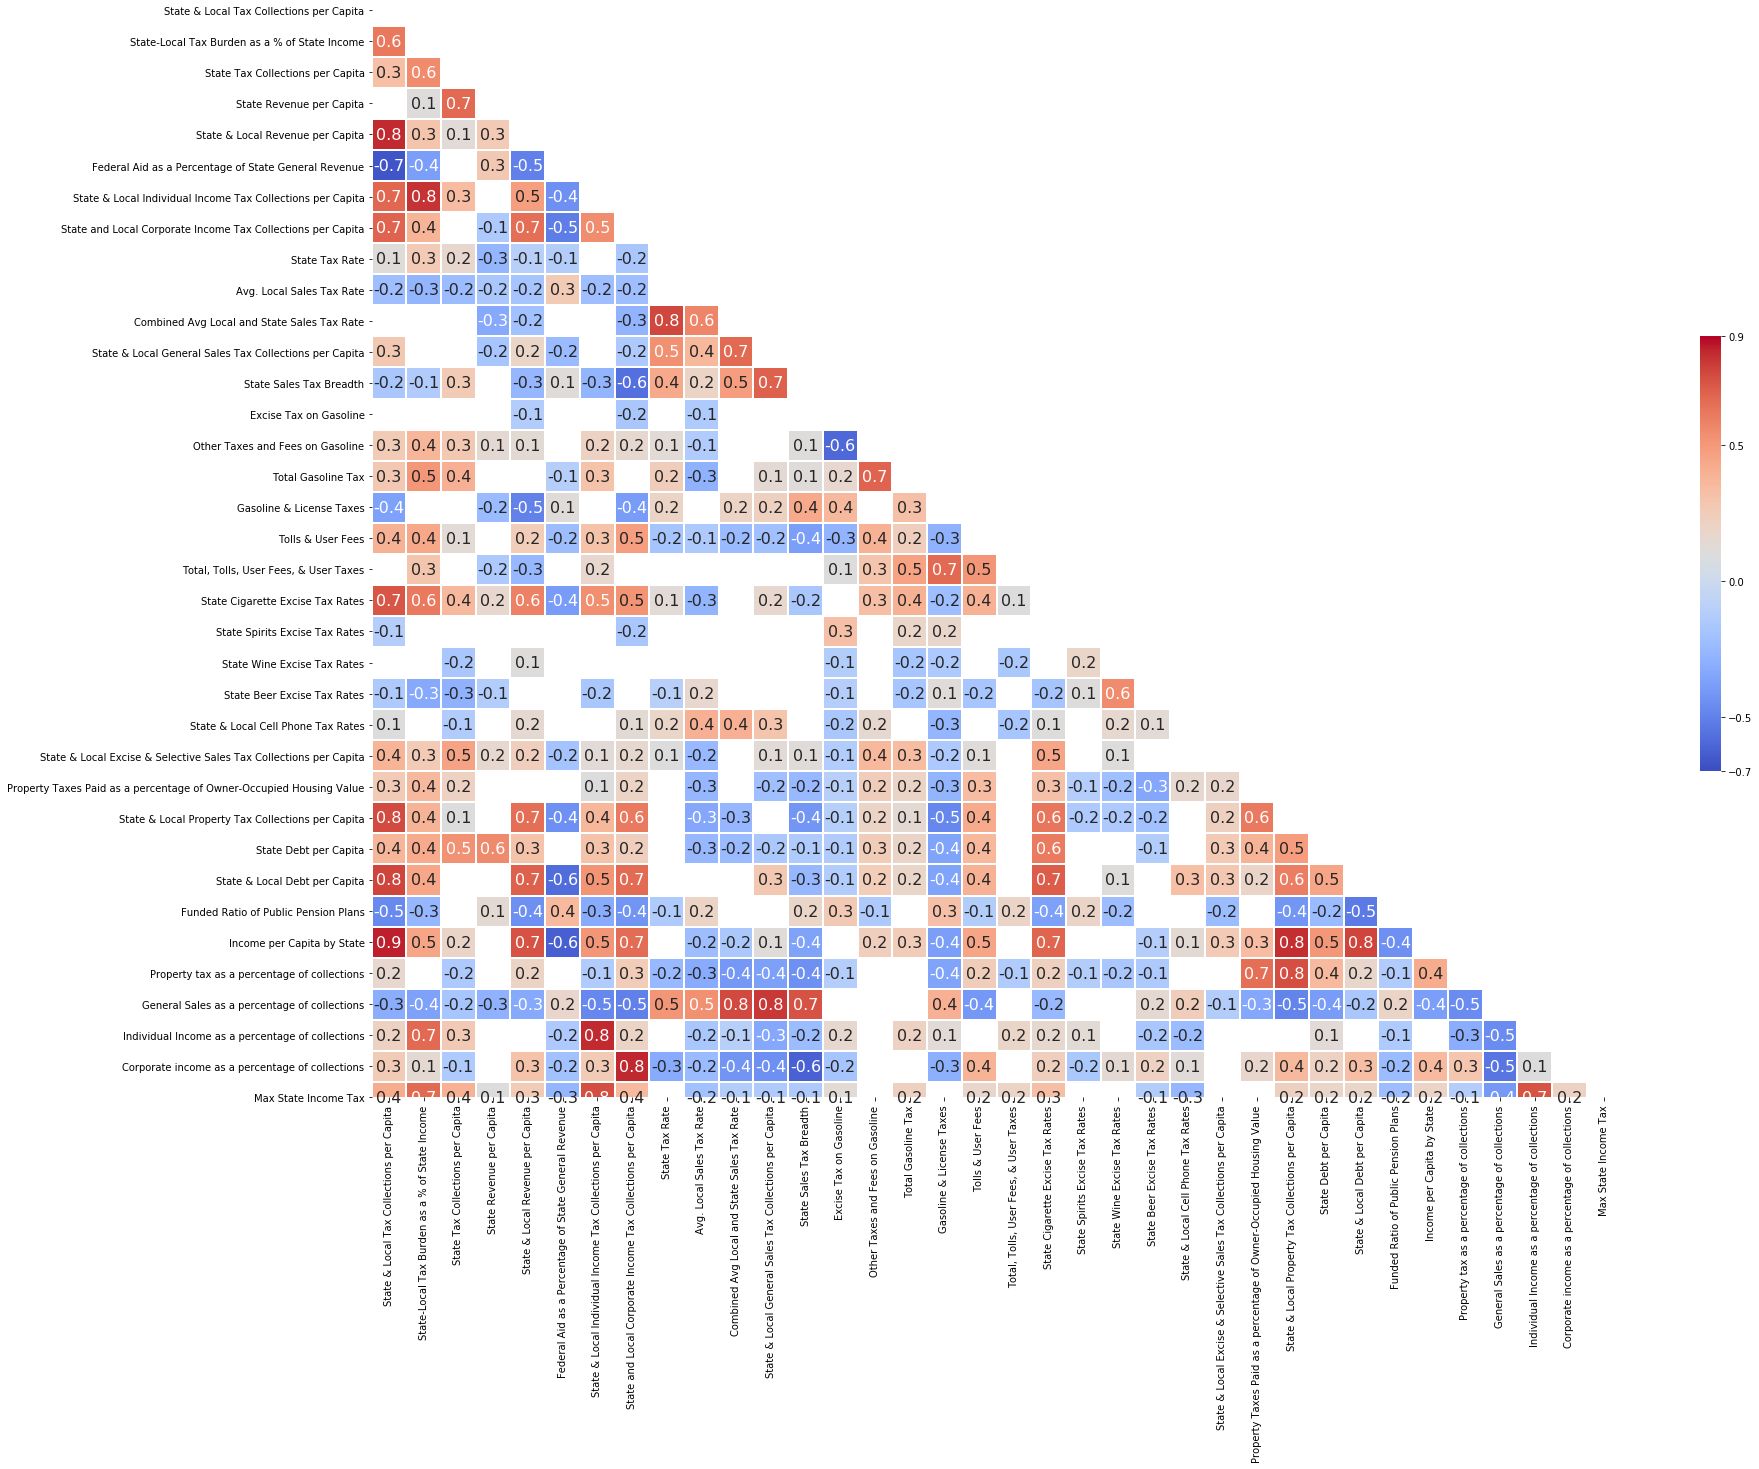

In [8]:
#eliminates top half left of diagonal
mask = np.zeros_like(corr2, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(28, 20)) 
heatmap = sns.heatmap(corr2, 
                      mask = mask,
                      #makes the boxes square
                      square = False,
                      linewidths = 1,
                      #set color theme
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                  'ticks' : [-0.7, -.5, 0, 0.5, 0.9]},
                      #set values, usually -1.0 to 1.0
                      vmin = -0.7, 
                      vmax =0.9,
                      annot = True,
                      annot_kws = {'size': 16},
                      #specifies how many sig figs / formats annotated result
                      fmt='.1'
                    )
#add the column names as labels
ax.set_yticklabels(corr2.columns, rotation = 0)
ax.set_xticklabels(corr2.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

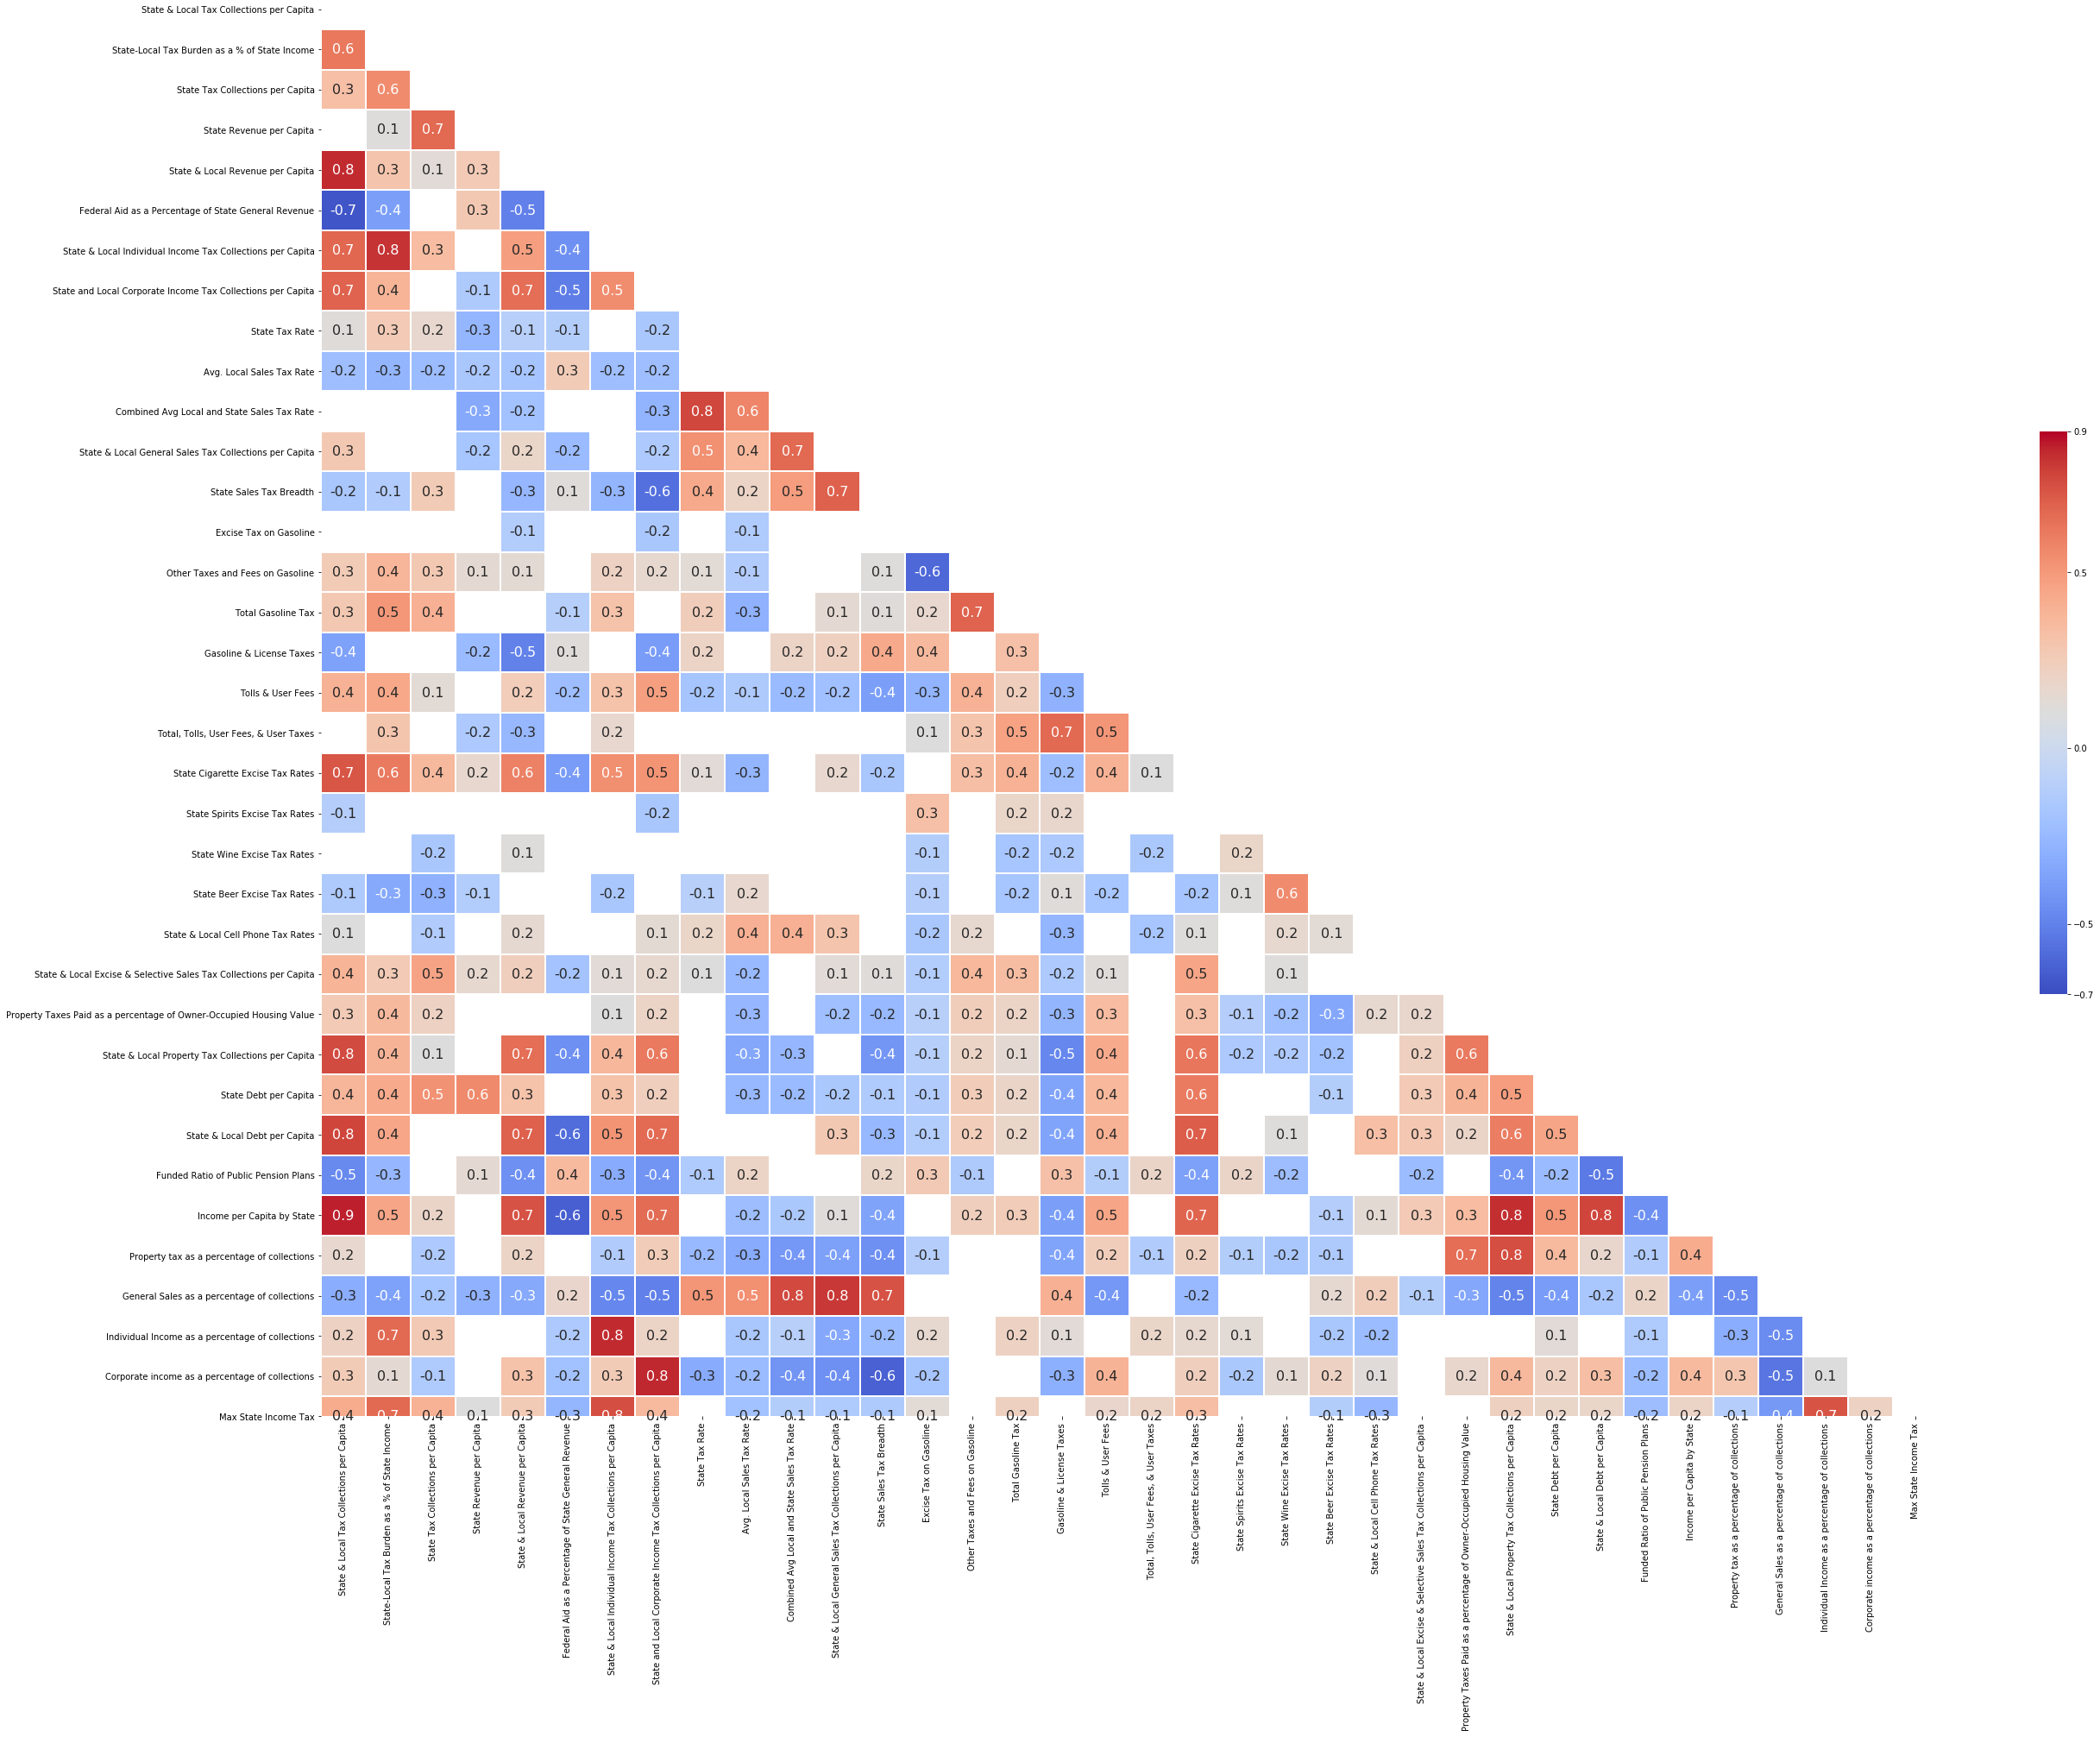

In [9]:
#manually make the table bigger
figsize = f.get_size_inches()
f.set_size_inches(figsize * 1.5)  # scale current size by 1.5
#looks bigger when exported
f

In [10]:
#save the heatmap, specify path
heatmap.get_figure().savefig('heatmap_example.png', bbox_inches='tight')

#### Why is the bottom cut off? Because of a bug...
https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot